# Regressão
    - Algoritmo de recomendação de preços.

## Desafio

 - Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

 - Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.

## Plano do Projeto
        O plano do projeto é o seguinte:
                1. Primeiro, baixamos o conjunto de dados.
                2. A seguir, fazemos algumas análises preliminares dos dados.
                3. Depois disso, configuramos uma estratégia de validação para garantir que nosso modelo produza previsões corretas.
                4. Em seguida, implementamos um modelo de regressão linear em Python e NumPy.
                5. A seguir, abordamos a engenharia de recursos para extrair recursos importantes dos dados para melhorar o modelo.
                6. Finalmente, vemos como tornar o nosso modelo estável com regularização e utilizá-lo para prever os preços.


## Variáveis
    - Como podemos ver, este conjunto de dados contém várias colunas:
        1. id
        2. nome
        3. host_id
        4. bairro_group
        5. bairro
        6. latitude
        7. longitude
        8. room_type
        9. price
        10. minimo_noites
        11. numero_de_reviews
        12. ultima_review
        13. reviews_por_mes
        14. calculado_host_listinings_count
        15. disponibilidade_365

    Será utilizado como target do problema a variável: Price.

## Análise Exploratória de Dados

- Compreender os dados é uma etapa importante no processo de aprendizado de máquina. Antes de podermos treinar qualquer modelo, precisamos saber que tipo de dados temos e se eles são úteis. Fazemos isso com análise exploratória de dados (EDA).

- Observamos o conjunto de dados para aprender
    1. A distribuição da variável alvo
    2. As features neste conjunto de dados
    3. A distribuição de valores nessas features
    4. A qualidade dos dados
    5. O número de valores faltantes

# Análise de Dados

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Biblioteca
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from datetime import datetime
import folium
%matplotlib inline

In [3]:
# Carregando os dados
#dados = 'C:/Users/HartB/Documents/Projeto/Indicium/teste_indicium_precificacao.csv'
dados = './teste_indicium_precificacao.csv'

df = pd.read_csv(dados)

In [4]:
# Informações dos dados
df['ultima_review'] = pd.to_datetime(df['ultima_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             48894 non-null  int64         
 1   nome                           48878 non-null  object        
 2   host_id                        48894 non-null  int64         
 3   host_name                      48873 non-null  object        
 4   bairro_group                   48894 non-null  object        
 5   bairro                         48894 non-null  object        
 6   latitude                       48894 non-null  float64       
 7   longitude                      48894 non-null  float64       
 8   room_type                      48894 non-null  object        
 9   price                          48894 non-null  int64         
 10  minimo_noites                  48894 non-null  int64         
 11  numero_de_revie

In [5]:
# Amostra dos dados 
df.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


# Pre-processamento

In [6]:
# Contar valores nulos em cada coluna
contagem_nulos = df.isnull().sum()

# Remover linhas com valores nulos
df = df.dropna()

In [7]:
#tipo dos dados e quantidade de nulos e não nulos em cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38820 entries, 0 to 48851
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             38820 non-null  int64         
 1   nome                           38820 non-null  object        
 2   host_id                        38820 non-null  int64         
 3   host_name                      38820 non-null  object        
 4   bairro_group                   38820 non-null  object        
 5   bairro                         38820 non-null  object        
 6   latitude                       38820 non-null  float64       
 7   longitude                      38820 non-null  float64       
 8   room_type                      38820 non-null  object        
 9   price                          38820 non-null  int64         
 10  minimo_noites                  38820 non-null  int64         
 11  numero_de_reviews   

In [8]:
# Calcular a diferença em dias até a data atual
df['dias_desde_utima_reforma'] = (pd.to_datetime('today') - df['ultima_review']).dt.days

In [9]:
# Removendo colunas de identificação e bairro
df = df.drop('bairro', axis=1)
df = df.drop('host_name', axis=1)
df = df.drop('host_id', axis=1)
df = df.drop('nome', axis=1)
df = df.drop('id', axis=1)

In [10]:
# Resetar os índices
df = df.reset_index(drop=True)

In [11]:
# Calculando estatísticas descritivas
descritivo = df.describe()

print(descritivo)

           latitude     longitude         price  minimo_noites  \
count  38820.000000  38820.000000  38820.000000   38820.000000   
mean      40.728131    -73.951148    142.332354       5.869346   
min       40.506410    -74.244420      0.000000       1.000000   
25%       40.688640    -73.982462     69.000000       1.000000   
50%       40.721710    -73.954805    101.000000       2.000000   
75%       40.762990    -73.935020    170.000000       4.000000   
max       40.913060    -73.712990  10000.000000    1250.000000   
std        0.054990      0.046693    196.997290      17.389233   

       numero_de_reviews                  ultima_review  reviews_por_mes  \
count       38820.000000                          38820     38820.000000   
mean           29.290778  2018-10-04 07:23:14.374033920         1.373259   
min             1.000000            2011-03-28 00:00:00         0.010000   
25%             3.000000            2018-07-09 00:00:00         0.190000   
50%             9.000000 

In [12]:
# Remover linhas onde o preço é zero
df = df[df['price'] != 0]

In [13]:
# Removendo os "_" e transformando em minúculo o nome das colunas
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Removendo os " " e transformando em minúculo os valores dos atributos object
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_') 

In [14]:
df.head(5)

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,dias_desde_utima_reforma
0,manhattan,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355,1732
1,brooklyn,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194,1687
2,manhattan,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0,1915
3,manhattan,40.74767,-73.97500,entire_home/apt,200,3,74,2019-06-22,0.59,1,129,1700
4,brooklyn,40.68688,-73.95596,private_room,60,45,49,2017-10-05,0.40,1,0,2325


C:\Users\HartB\AppData\Local\Temp\ipykernel_8916\478348241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bairro_group', y='price', palette='Set2')  # Defina o esquema de cores aqui


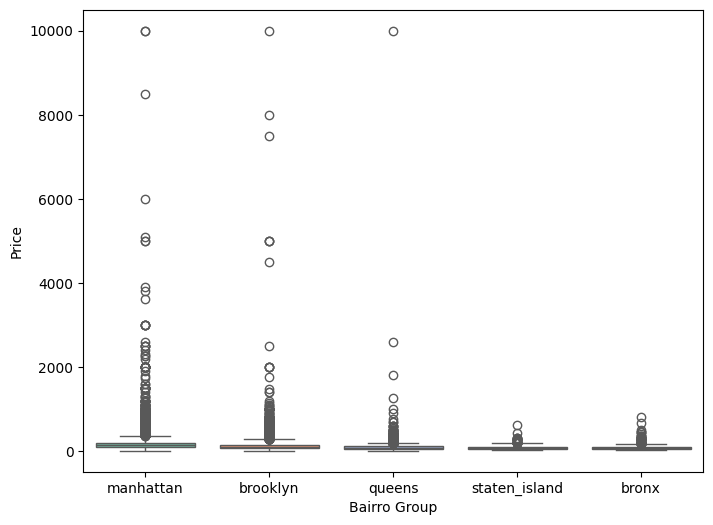

In [15]:
# Boxplot do Bairro por Preço
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bairro_group', y='price', palette='Set2')  # Defina o esquema de cores aqui
plt.title('')
plt.xlabel('Bairro Group')
plt.ylabel('Price')
plt.show()

C:\Users\HartB\AppData\Local\Temp\ipykernel_8916\1874976153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='price', palette='Set2')  # Defina o esquema de cores aqui


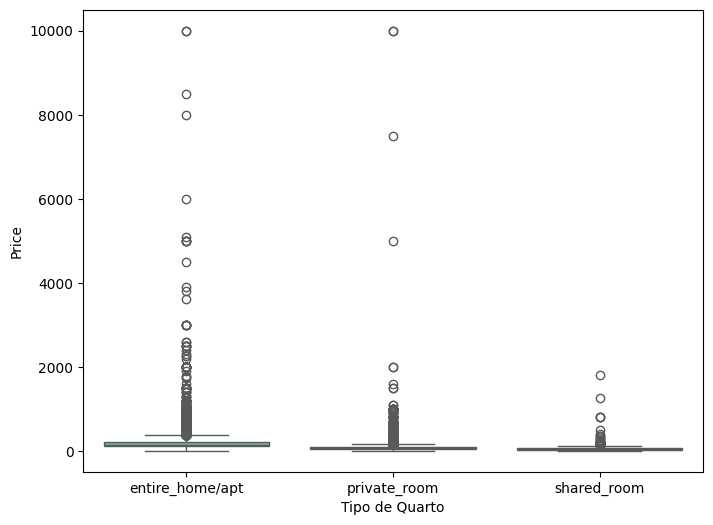

In [16]:
# Boxplot do Tipo de carro por Preço
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='room_type', y='price', palette='Set2')  # Defina o esquema de cores aqui
plt.title('')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Price')
plt.show()

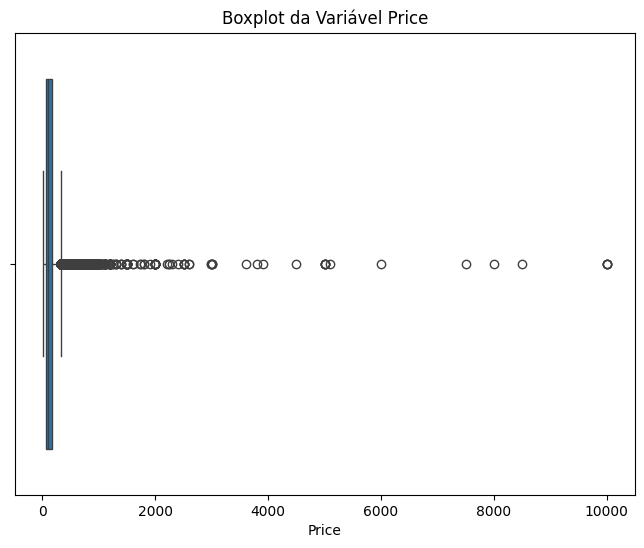

In [17]:
# Boxplot do preço
plt.figure(figsize=(8, 6))  
sns.boxplot(x=df['price'])
plt.title('Boxplot da Variável Price')
plt.xlabel('Price')
plt.show()

#Existem muitos outliers, porém a variabilidade dos preços é pequena, assim como podemos visualizar pelo tamanho da caixa.

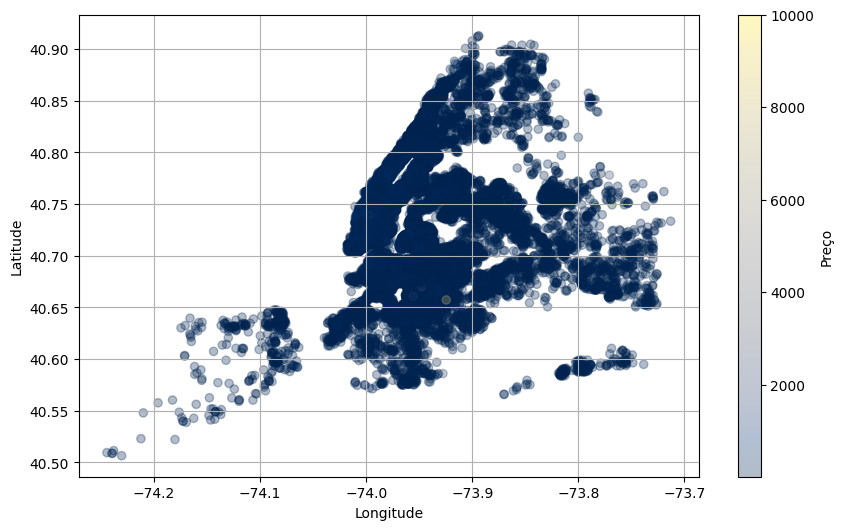

In [18]:
# Preço pela latitude e longitude
plt.figure(figsize=(10, 6))  
plt.scatter(df['longitude'], df['latitude'], alpha=0.3, c=df['price'], cmap='cividis')  
plt.colorbar(label='Preço')  
plt.title('')  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.grid(True)  
plt.show()

<Axes: xlabel='price', ylabel='Count'>

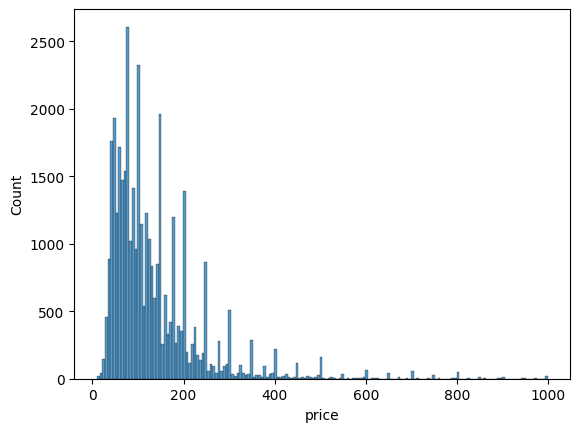

In [19]:
# Podemos dar uma olhada mais de perto aumentando um pouco o zoom e observando valores abaixo de US$ 100.000
sns.histplot(df.price[df.price < 1000])

In [20]:
# Checando Valores faltantes
df.isnull().sum()

bairro_group                     0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dias_desde_utima_reforma         0
dtype: int64

In [21]:
#estatísticas do banco de dados

df.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,dias_desde_utima_reforma
count,38810.000000,38810.000000,38810.000000,38810.000000,38810.000000,38810,38810.000000,38810.000000,38810.000000,38810.000000
mean,40.728136,-73.951156,142.369029,5.868848,29.288611,2018-10-04 06:51:04.406081024,1.373165,5.166735,114.875187,1960.714532
min,40.506410,-74.244420,10.000000,1.000000,1.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000,1684.000000
25%,40.688640,-73.982470,69.000000,1.000000,3.000000,2018-07-09 00:00:00,0.190000,1.000000,0.000000,1699.000000
50%,40.721710,-73.954810,101.000000,2.000000,9.000000,2019-05-19 00:00:00,0.720000,1.000000,55.000000,1734.000000
75%,40.762997,-73.935030,170.000000,4.000000,33.000000,2019-06-23 00:00:00,2.020000,2.000000,229.000000,2048.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000,4708.000000
std,0.054992,0.046696,197.009418,17.390521,48.185164,NaN,1.680288,26.306665,129.530852,413.707960


In [22]:
# Remover a coluna 'ultima_review'
df = df.drop('ultima_review', axis=1)

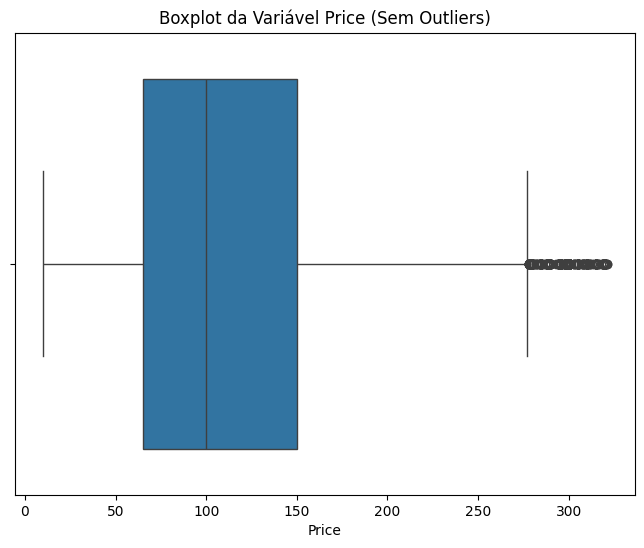

Número de outliers removidos: 2077


In [23]:
# Calcular o intervalo interquartil (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Contar o número de outliers
num_outliers = outliers.shape[0]

# Remover outliers do DataFrame
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Criar o boxplot dos dados limpos
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot da Variável Price (Sem Outliers)')
plt.xlabel('Price')
plt.show()

print("Número de outliers removidos:", num_outliers)


<Axes: xlabel='price', ylabel='Count'>

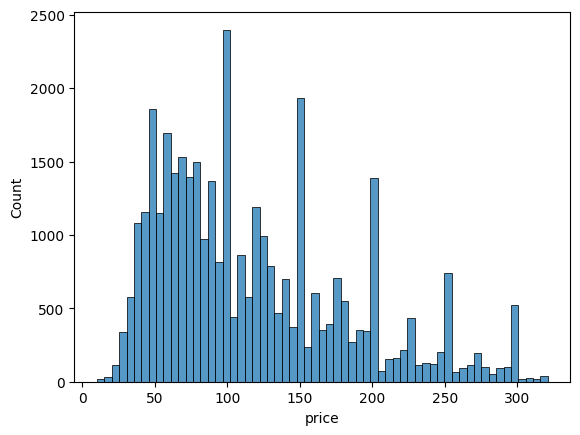

In [24]:
sns.histplot(df['price'])

In [25]:
from scipy.stats import shapiro

# Aplicar o teste de normalidade de Shapiro-Wilk
stat, p_value = shapiro(df['price'])

# Interpretar o resultado do teste
alpha = 0.05
if p_value > alpha:
    print("A variável price segue uma distribuição normal (não rejeitamos a hipótese nula)")
else:
    print("A variável price não segue uma distribuição normal (rejeitamos a hipótese nula)")


A variável price não segue uma distribuição normal (rejeitamos a hipótese nula)


c:\Users\HartB\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [26]:
from scipy.stats import kstest

# Aplicar o teste de Kolmogorov-Smirnov
stat, p_value = kstest(df['price'], 'norm')

# Interpretar o resultado do teste
alpha = 0.05
if p_value > alpha:
    print("A variável price segue uma distribuição normal (não rejeitamos a hipótese nula)")
else:
    print("A variável price não segue uma distribuição normal (rejeitamos a hipótese nula)")


A variável price não segue uma distribuição normal (rejeitamos a hipótese nula)


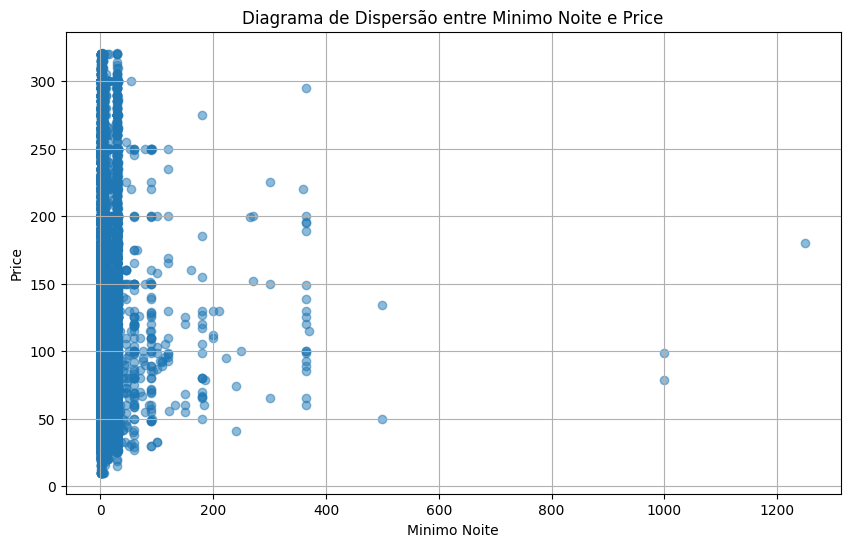

In [27]:
import matplotlib.pyplot as plt

# Criar o diagrama de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['minimo_noites'], df['price'], alpha=0.5)
plt.title('Diagrama de Dispersão entre Minimo Noite e Price')
plt.xlabel('Minimo Noite')
plt.ylabel('Price')
plt.grid(True)
plt.show()


C:\Users\HartB\AppData\Local\Temp\ipykernel_8916\3819635860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sorted, x='minimo_noites', y='price', palette='Set2')


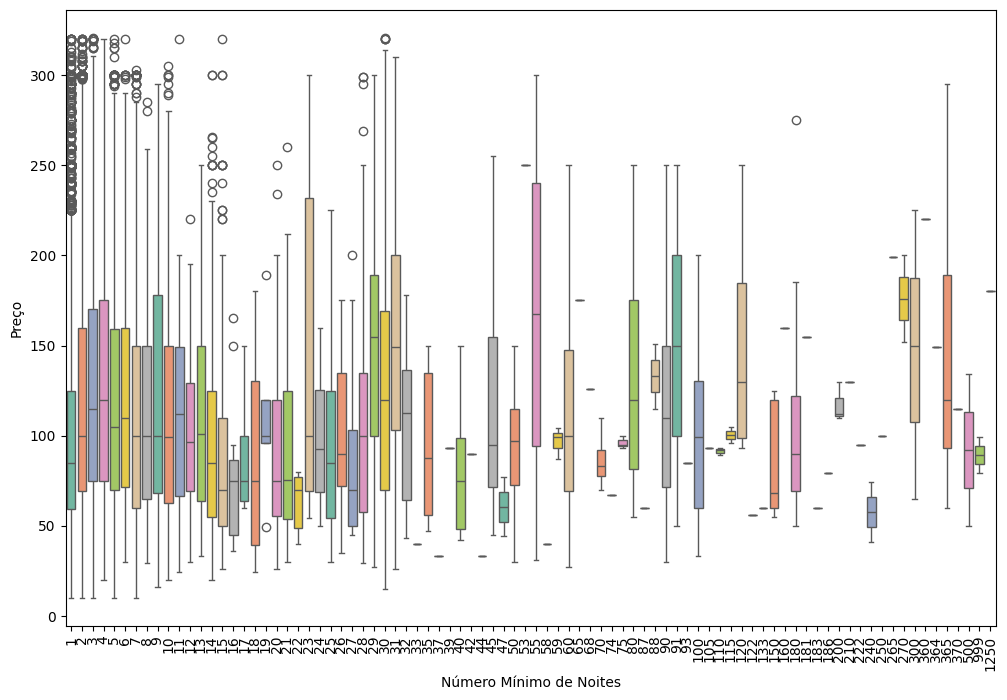

In [28]:
# Ordenar o DataFrame pelo número mínimo de noites
df_sorted = df.sort_values(by='minimo_noites')

# Criar o boxplot com os bairros ordenados
plt.figure(figsize=(12, 8))  # Aumentando o tamanho da figura
sns.boxplot(data=df_sorted, x='minimo_noites', y='price', palette='Set2')
plt.title('')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço')
plt.xticks(rotation=90)  # Rotacionando os rótulos do eixo x
plt.show()

#Não há padrão em relação ao preço e ao número minimo de noites 

## Estrutura de Validação
    - Precisamos dividir o conjunto de dados em três partes: treinamento, validação e teste

In [29]:
# Total de registros
n = len(df) 

# Tamanhos dos conjuntos
n_val = int(0.2 * n) 
n_test = int(0.2 * n) 
n_train = n - (n_val + n_test) 

# Fixando semente
np.random.seed(2) 

# Array de índeces
idx = np.arange(n) 

# Misturando os índeces
np.random.shuffle(idx) 

# Locanlizando os dados com base nos índeces
df_shuffled = df.iloc[idx] 

# Misturando os índices e dividindo os dados em três parcelas: 0 : x; x: y; y:z
df_train = df_shuffled.iloc[:n_train].copy() 
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() 
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [30]:
#y traino, validação e teste
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [31]:
# Para evitar o uso acidental da target posteriormente, vamos removê-la dos dataframes
del df_train['price']
del df_val['price']
del df_test['price']

## Análise de Correlação

In [32]:
# Análise de correlação
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,dias_desde_utima_reforma
0,40.75362,-73.98377,225,1,45,0.38,2,355,1732
1,40.68514,-73.95976,89,1,270,4.64,1,194,1687
2,40.79851,-73.94399,80,10,9,0.10,1,0,1915
3,40.74767,-73.97500,200,3,74,0.59,1,129,1700
4,40.68688,-73.95596,60,45,49,0.40,1,0,2325
...,...,...,...,...,...,...,...,...,...
38815,40.78099,-73.95366,129,1,1,1.00,1,147,1685
38816,40.75104,-73.81459,45,1,1,1.00,6,339,1685
38817,40.54179,-74.14275,235,1,1,1.00,1,87,1685
38818,40.80787,-73.92400,100,1,2,2.00,1,40,1685


In [33]:
# Calcula a matriz de correlação
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()
price_correlations = correlation_matrix['price'].abs().sort_values(ascending=False) # Correlações com a variável resposta 
price_correlations.sort_values(ascending=False).astype(float)

price                            1.000000
longitude                        0.305061
calculado_host_listings_count    0.125511
latitude                         0.055619
reviews_por_mes                  0.038546
disponibilidade_365              0.037964
minimo_noites                    0.019689
numero_de_reviews                0.018754
dias_desde_utima_reforma         0.005203
Name: price, dtype: float64

In [34]:
# Filtrando as colunas com maiores correlações
# Define um limiar de correlação
threshold = 0.03

# Filtra as colunas com valores absolutos de correlação menores ou iguais ao limiar - objetivo dropar
significant_correlations = price_correlations[price_correlations.abs() <= threshold]

# Armazena as colunas em um objeto 
selected_num_columns = significant_correlations.index

# Exibe as colunas selecionadas
print(selected_num_columns)

Index(['minimo_noites', 'numero_de_reviews', 'dias_desde_utima_reforma'], dtype='object')


## Variáveis Categóricas

In [35]:
# Selecionando as colunas categóricas
object_columns = df_train.select_dtypes(include=['object']).columns.tolist()


# Obtendo as dummies
df_train1 = df_train
df_train1 = pd.get_dummies(df_train1, columns=object_columns,drop_first=True)

df_train1


,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,dias_desde_utima_reforma,bairro_group_brooklyn,bairro_group_manhattan,bairro_group_queens,bairro_group_staten_island,room_type_private_room,room_type_shared_room
7877,40.68402,-73.95573,3,101,2.08,2,293,1744,True,False,False,False,False,False
31460,40.72036,-73.98883,3,9,1.32,2,0,1696,False,True,False,False,False,True
16658,40.66209,-73.92913,1,23,0.74,2,364,1875,True,False,False,False,False,True
2415,40.68799,-73.91677,3,73,1.00,8,341,1896,True,False,False,False,True,False
32831,40.73501,-73.87989,30,1,0.23,103,234,1813,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18930,40.84662,-73.93436,1,23,0.87,1,138,1755,False,True,False,False,True,False
14328,40.79878,-73.94495,4,15,0.42,1,0,2376,False,True,False,False,False,False
20060,40.79749,-73.93336,1,1,0.05,2,177,2259,False,True,False,False,True,False
4676,40.68431,-73.99782,5,4,0.07,1,0,3023,True,False,False,False,False,False


# Regressão Linear Múltipla
    - Para prever o preço de um carro, precisamos usar um modelo de aprendizado de máquina. Para fazer isso, usaremos a regressão linear.

In [36]:
# # Adicionando uma constante de intercepto ao modelo - coluna de valores 1
X = sm.add_constant(df_train1)

# # Dropando algumas variáveis numéricas com correlação baixa
X = X.drop(columns=selected_num_columns,axis=1)

X = X.replace({False: 0, True: 1})
X


,const,latitude,longitude,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_brooklyn,bairro_group_manhattan,bairro_group_queens,bairro_group_staten_island,room_type_private_room,room_type_shared_room
7877,1.0,40.68402,-73.95573,2.08,2,293,1,0,0,0,0,0
31460,1.0,40.72036,-73.98883,1.32,2,0,0,1,0,0,0,1
16658,1.0,40.66209,-73.92913,0.74,2,364,1,0,0,0,0,1
2415,1.0,40.68799,-73.91677,1.00,8,341,1,0,0,0,1,0
32831,1.0,40.73501,-73.87989,0.23,103,234,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18930,1.0,40.84662,-73.93436,0.87,1,138,0,1,0,0,1,0
14328,1.0,40.79878,-73.94495,0.42,1,0,0,1,0,0,0,0
20060,1.0,40.79749,-73.93336,0.05,2,177,0,1,0,0,1,0
4676,1.0,40.68431,-73.99782,0.07,1,0,1,0,0,0,0,0


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22041 entries, 7877 to 6003
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          22041 non-null  float64
 1   latitude                       22041 non-null  float64
 2   longitude                      22041 non-null  float64
 3   reviews_por_mes                22041 non-null  float64
 4   calculado_host_listings_count  22041 non-null  int64  
 5   disponibilidade_365            22041 non-null  int64  
 6   bairro_group_brooklyn          22041 non-null  int64  
 7   bairro_group_manhattan         22041 non-null  int64  
 8   bairro_group_queens            22041 non-null  int64  
 9   bairro_group_staten_island     22041 non-null  int64  
 10  room_type_private_room         22041 non-null  int64  
 11  room_type_shared_room          22041 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 2.2 MB


In [38]:
# from sklearn.preprocessing import StandardScaler

# # Selecionar colunas numéricas
# numeric_cols = X.select_dtypes(include=['int', 'float']).columns.tolist()

# # Inicializar o StandardScaler
# scaler = StandardScaler()

# # Aplicar a padronização apenas nas colunas numéricas e substituir os valores no DataFrame original
# X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Lista das colunas numéricas que você deseja aplicar a escala Min-Max
numeric_cols = X.select_dtypes(include=['int', 'float']).columns.tolist()

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a escala Min-Max apenas nas colunas numéricas e substituir os valores no DataFrame original
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [40]:
X

,const,latitude,longitude,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_brooklyn,bairro_group_manhattan,bairro_group_queens,bairro_group_staten_island,room_type_private_room,room_type_shared_room
7877,0.0,0.436764,0.543232,0.074087,0.003067,0.802740,1.0,0.0,0.0,0.0,0.0,0.0
31460,0.0,0.526128,0.480948,0.046886,0.003067,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
16658,0.0,0.382835,0.593286,0.026127,0.003067,0.997260,1.0,0.0,0.0,0.0,0.0,1.0
2415,0.0,0.446526,0.616544,0.035433,0.021472,0.934247,1.0,0.0,0.0,0.0,1.0,0.0
32831,0.0,0.562154,0.685942,0.007874,0.312883,0.641096,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18930,0.0,0.836616,0.583445,0.030780,0.000000,0.378082,0.0,1.0,0.0,0.0,1.0,0.0
14328,0.0,0.718972,0.563517,0.014674,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
20060,0.0,0.715800,0.585326,0.001432,0.003067,0.484932,0.0,1.0,0.0,0.0,1.0,0.0
4676,0.0,0.437477,0.464031,0.002147,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Ajuste o modelo de regressão
model = sm.OLS(y_train, X).fit()

# Obtenha o resumo da regressão
summary = model.summary()

# Exiba o resumo
print(summary) # Popularity e highway_mpg não foram significativos                                                   



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                          1.303e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        18:49:37   Log-Likelihood:                     -1.1701e+05
No. Observations:               22041   AIC:                                  2.340e+05
Df Residuals:                   22030   BIC:                                  2.341e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

c:\Users\HartB\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [42]:
import statsmodels.api as sm
import pandas as pd

# Ajuste o modelo de regressão
model = sm.OLS(y_train, X).fit()

# Obtenha os resultados da regressão
results = model.summary()

# Obtenha os valores de p-valor
p_values = model.pvalues

# Crie um DataFrame com o nome das variáveis e os valores de p-valor
p_values_df = pd.DataFrame({'Variable': p_values.index, 'P-Value': p_values.values}).sort_values(by='P-Value', ascending=False)
p_values_df = p_values_df[p_values_df['P-Value']>=0.05]

# Exiba o DataFrame
print(p_values_df)


          Variable   P-Value
3  reviews_por_mes  0.209141


c:\Users\HartB\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [43]:
while len(p_values_df)>0:

    max_p_variable = p_values_df.loc[p_values_df['P-Value'].idxmax()]['Variable']

    X = X.drop(columns=max_p_variable,axis=1)

    # Ajuste o modelo de regressão
    model = sm.OLS(y_train, X).fit()
    results = model.summary()


    # Obtenha os valores de p-valor
    p_values = model.pvalues

    # Crie um DataFrame com o nome das variáveis e os valores de p-valor
    p_values_df = pd.DataFrame({'Variable': p_values.index, 'P-Value': p_values.values}).sort_values(by='P-Value', ascending=False)
    p_values_df = p_values_df[p_values_df['P-Value']>=0.05]
    
    # Exiba o DataFrame
    print(len(p_values_df))
    
results

0


c:\Users\HartB\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                          1.434e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        18:49:37   Log-Likelihood:                     -1.1701e+05
No. Observations:               22041   AIC:                                  2.340e+05
Df Residuals:                   22031   BIC:                                  2.341e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                                  0          0        nan        nan           0           0
latitude                         62.5767      3.509     17.833      0.000      55.699      69.455
longitude                        33.0658      4.611      7.170      0.000      24.027      42.104
calculado_host_listings_count    37.6762      4.649      8.104      0.000      28.564      46.788
disponibilidade_365              20.3323      0.976     20.825      0.000      18.419      22.246
bairro_group_brooklyn            93.9771      1.660     56.623      0.000      90.724      97.230
bairro_group_manhattan          110.4352      1.552     71.143      0.000     107.393     113.478
bairro_group_queens              68.9491      2.208     31.228      0.000      64.621      73.277
bairro_group_staten_island       89.2218      3.751     23.784      0.000      81.869      96.575
room_type_private_room          -75.6093      0.680   -111.208      0.000     -76.942     -74.277
room_type_shared_room           -99.3071      2.294    -43.282      0.000    -103.804     -94.810
==============================================================================
Omnibus:                     2681.976   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4336.764
Skew:                           0.855   Prob(JB):                         0.00
Kurtosis:                       4.340   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                          1.434e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        18:49:37   Log-Likelihood:                     -1.1701e+05
No. Observations:               22041   AIC:                                  2.340e+05
Df Residuals:                   22031   BIC:                                  2.341e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                                  0          0        nan        nan           0           0
latitude                         62.5767      3.509     17.833      0.000      55.699      69.455
longitude                        33.0658      4.611      7.170      0.000      24.027      42.104
calculado_host_listings_count    37.6762      4.649      8.104      0.000      28.564      46.788
disponibilidade_365              20.3323      0.976     20.825      0.000      18.419      22.246
bairro_group_brooklyn            93.9771      1.660     56.623      0.000      90.724      97.230
bairro_group_manhattan          110.4352      1.552     71.143      0.000     107.393     113.478
bairro_group_queens              68.9491      2.208     31.228      0.000      64.621      73.277
bairro_group_staten_island       89.2218      3.751     23.784      0.000      81.869      96.575
room_type_private_room          -75.6093      0.680   -111.208      0.000     -76.942     -74.277
room_type_shared_room           -99.3071      2.294    -43.282      0.000    -103.804     -94.810
==============================================================================
Omnibus:                     2681.976   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4336.764
Skew:                           0.855   Prob(JB):                         0.00
Kurtosis:                       4.340   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
nova_obs = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

colunas_min_max = X.select_dtypes(include=['int', 'float']).columns.tolist()

for coluna, valor in nova_obs.items():
    if coluna in colunas_min_max:
        minimo = np.max(df[coluna])
        maximo = np.min(df[coluna])

        nova_obs[coluna] = (valor - minimo)/(maximo-minimo)

caracteristicas = [1,nova_obs['latitude'],nova_obs['longitude'],nova_obs['calculado_host_listings_count'],nova_obs['disponibilidade_365'],0,1,0,0,0,0]

preco_predito = model.predict([caracteristicas])


print(f'Preço predito para a nova observação: {preco_predito}')

Preço predito para a nova observação: [189.93606796]


In [48]:
#adicionando o modelo de machine learning em um arquivo pkl
import pickle

with open("modelo_ols.pkl", "wb") as f:
    pickle.dump(model, f)

print("Modelo de regressão OLS salvo com sucesso em modelo_ols.pkl")

Modelo de regressão OLS salvo com sucesso em modelo_ols.pkl
